<h2><center> UrbanFlow Prognosticator: Propagation-Aware Traffic Prediction and Visualization System</h2></center>
<figure>
<center><img src ="https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-030-94102-4_6/MediaObjects/509967_1_En_6_Fig1_HTML.png" width = "750" height = '500' alt="unsplash.com"/>

## Author: Umar Kabir

Date: [July, 2023]

<a id='table-of-contents'></a>
# Table of Contents

1. [Introduction](#introduction)
    - Motivation
    - Problem Statement
    - Objective
    - Data Source
    - Importing Dependencies  


2. [Data](#2-data)
    - Data Loading
    - Dataset Overview


3. [Exploratory Data Analysis](#exploratory-data-analysis)
    - Descriptive Statistics
    - Data Visualization
    - Correlation Analysis
    - Outlier Detection


4. [Data Preparation](#data-preparation)
    - Data Cleaning
    - Handling Missing Values
    - Handling Imbalanced Classes
    - Feature Selection
    - Feature Engineering
    - Data Transformation
    - Data Splitting

<a id='introduction'></a>
<font size="+2" color='#053c96'><b> Introduction</b></font>  
[back to top](#table-of-contents)  

<font size="+0" color='green'><b> Possible Target Variables</b></font>  


<font size="+0" color='green'><b> Motivation</b></font>  


<font size="+0" color='green'><b> Problem Statement</b></font>  



<font size="+0" color='green'><b> Objectives</b></font>  


<font size="+0" color='green'><b> Data Source</b></font>  


<font size="+0" color='green'><b> Importing Dependencies</b></font>  

In [1]:
import sys
# Insert the parent path relative to this notebook so we can import from the src folder.
sys.path.insert(0, "..")

from src.dependencies import *
from src.functions import *

<a id='#data'></a>
<font size="+2" color='#053c96'><b> Data</b></font>  
[back to top](#table-of-contents)

<font size="+0" color='green'><b> Data Loading</b></font>  

In [2]:
# Read the configuration file
with open('../data/PeMS04/config.json') as f:
    config_data = json.load(f)

# Extracting relevant information from config
rel_file = config_data["info"]["rel_file"] + ".rel"
dyna_file = config_data["info"]["data_files"][0] + ".dyna"
geo_file = config_data["info"]["geo_file"] + ".geo"

# Load the dataframes
pems04_rel = pd.read_csv(f'../data/PeMS04/{rel_file}', delimiter=',')
pems04_dyna = pd.read_csv(f'../data/PeMS04/{dyna_file}', delimiter=',')
pems04_geo = pd.read_csv(f'../data/PeMS04/{geo_file}', delimiter=',')

In [3]:
# Read the configuration file
with open('../data/PeMS07/config.json') as f:
    config_data = json.load(f)

# Extracting relevant information from config
rel_file = config_data["info"]["rel_file"] + ".rel"
dyna_file = config_data["info"]["data_files"][0] + ".dyna"
geo_file = config_data["info"]["geo_file"] + ".geo"

# Load the dataframes
pems07_rel = pd.read_csv(f'../data/PeMS07/{rel_file}', delimiter=',')
pems07_dyna = pd.read_csv(f'../data/PeMS07/{dyna_file}', delimiter=',')
pems07_geo = pd.read_csv(f'../data/PeMS07/{geo_file}', delimiter=',')

In [4]:
# Read the configuration file
with open('../data/PeMS08/config.json') as f:
    config_data = json.load(f)

# Extracting relevant information from config
rel_file = config_data["info"]["rel_file"] + ".rel"
dyna_file = config_data["info"]["data_files"][0] + ".dyna"
geo_file = config_data["info"]["geo_file"] + ".geo"

# Load the dataframes
pems08_rel = pd.read_csv(f'../data/PeMS08/{rel_file}', delimiter=',')
pems08_dyna = pd.read_csv(f'../data/PeMS08/{dyna_file}', delimiter=',')
pems08_geo = pd.read_csv(f'../data/PeMS08/{geo_file}', delimiter=',')

In [5]:
with open('../data/NYCTaxi/config.json') as f:
    config_data = json.load(f)

# Extracting relevant information from config
NYCTaxi_grid_file = config_data["info"]["data_files"][0] + ".grid"
NYCTaxi_geo_file = config_data["info"]["geo_file"] + ".geo"

# Load the dataframes
NYCTaxi_grid = pd.read_csv(f'../data/NYCTaxi/{NYCTaxi_grid_file}', delimiter=',')
NYCTaxi_geo = pd.read_csv(f'../data/NYCTaxi/{NYCTaxi_geo_file}', delimiter=',')

In [6]:
nytaxi = pd.read_csv('../data/nyc_taxi_data_2014.csv')

<a id='exploratory-data-analysis'></a>
<font size="+2" color='#053c96'><b> Exploratory Data Analysis</b></font>  
[back to top](#table-of-contents)

<font size="+0" color='green'><b> Data Overview</b></font>  

In [7]:
print(f'\n\n {pems04_rel.info()} \n \n {pems04_dyna.info()} \n \n {pems04_geo.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rel_id          340 non-null    int64  
 1   type            340 non-null    object 
 2   origin_id       340 non-null    int64  
 3   destination_id  340 non-null    int64  
 4   cost            340 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 13.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216544 entries, 0 to 5216543
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   dyna_id            int64  
 1   type               object 
 2   time               object 
 3   entity_id          int64  
 4   traffic_flow       float64
 5   traffic_occupancy  float64
 6   traffic_speed      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 278.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 

In [8]:
pems04_rel.head()

,rel_id,type,origin_id,destination_id,cost
0,0,geo,73,5,352.6
1,1,geo,5,154,347.2
2,2,geo,154,263,392.9
3,3,geo,263,56,440.8
4,4,geo,56,96,374.6


In [9]:
pems04_dyna.head()

,dyna_id,type,time,entity_id,traffic_flow,traffic_occupancy,traffic_speed
0,0,state,2018-01-01T00:00:00Z,0,62.0,0.0077,67.9
1,1,state,2018-01-01T00:05:00Z,0,61.0,0.0074,67.3
2,2,state,2018-01-01T00:10:00Z,0,71.0,0.0093,68.4
3,3,state,2018-01-01T00:15:00Z,0,86.0,0.0112,67.8
4,4,state,2018-01-01T00:20:00Z,0,103.0,0.0144,67.4


In [10]:
pems04_geo.head()

,geo_id,type,coordinates
0,0,Point,[]
1,1,Point,[]
2,2,Point,[]
3,3,Point,[]
4,4,Point,[]


In [11]:
pems04_rel.shape

(340, 5)

In [12]:
pems04_dyna.shape

(5216544, 7)

In [13]:
pems04_geo.shape

(307, 3)

In [14]:
print(f'\n\n {pems07_rel.info()} \n \n {pems07_dyna.info()} \n \n {pems07_geo.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rel_id          866 non-null    int64  
 1   type            866 non-null    object 
 2   origin_id       866 non-null    int64  
 3   destination_id  866 non-null    int64  
 4   cost            866 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24921792 entries, 0 to 24921791
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   dyna_id       int64  
 1   type          object 
 2   time          object 
 3   entity_id     int64  
 4   traffic_flow  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 950.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  -

In [15]:
pems07_rel.head()

,rel_id,type,origin_id,destination_id,cost
0,0,geo,721,445,0.790
1,1,geo,542,480,2.575
2,2,geo,770,702,0.926
3,3,geo,32,266,0.596
4,4,geo,34,56,0.628


In [16]:
pems07_dyna.head()

,dyna_id,type,time,entity_id,traffic_flow
0,0,state,2017-05-01T00:00:00Z,0,246.0
1,1,state,2017-05-01T00:05:00Z,0,249.0
2,2,state,2017-05-01T00:10:00Z,0,243.0
3,3,state,2017-05-01T00:15:00Z,0,232.0
4,4,state,2017-05-01T00:20:00Z,0,243.0


In [17]:
pems07_geo.head()

,geo_id,type,coordinates
0,0,Point,[]
1,1,Point,[]
2,2,Point,[]
3,3,Point,[]
4,4,Point,[]


In [18]:
print(f'\n\n {pems08_rel.info()} \n \n {pems08_dyna.info()} \n \n {pems08_geo.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rel_id          277 non-null    int64  
 1   type            277 non-null    object 
 2   origin_id       277 non-null    int64  
 3   destination_id  277 non-null    int64  
 4   cost            277 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 10.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035520 entries, 0 to 3035519
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   dyna_id            int64  
 1   type               object 
 2   time               object 
 3   entity_id          int64  
 4   traffic_flow       float64
 5   traffic_occupancy  float64
 6   traffic_speed      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 162.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 

In [19]:
pems08_rel.head()

,rel_id,type,origin_id,destination_id,cost
0,0,geo,9,153,310.6
1,1,geo,153,62,330.9
2,2,geo,62,111,332.9
3,3,geo,111,11,324.2
4,4,geo,11,28,336.0


In [20]:
pems08_dyna.head()

,dyna_id,type,time,entity_id,traffic_flow,traffic_occupancy,traffic_speed
0,0,state,2016-07-01T00:00:00Z,0,133.0,0.0603,65.8
1,1,state,2016-07-01T00:05:00Z,0,114.0,0.0532,66.9
2,2,state,2016-07-01T00:10:00Z,0,140.0,0.0622,66.8
3,3,state,2016-07-01T00:15:00Z,0,106.0,0.0452,68.9
4,4,state,2016-07-01T00:20:00Z,0,117.0,0.0574,67.4


In [21]:
pems08_geo.head()

,geo_id,type,coordinates
0,0,Point,[]
1,1,Point,[]
2,2,Point,[]
3,3,Point,[]
4,4,Point,[]



### Rel DF

An element in the Rel DF consists of the following four parts:

rel_id, type, origin_id, destination_id, properties (multiple columns).

- rel_id: The primary key uniquely determines the relationship between entities.

- type: The type of rel. Range in [usr, geo], which indicates whether the relationship is based on geo or usr.

- origin_id: The ID of the origin of the relationship, which is either in the Geo DF or in the Usr DF.

- destination_id: The ID of the destination of the relationship, which is one of the Geo DF or the Usr DF.

- properties: Describe the attribute information of the relationship. If there are multiple attributes, different column names can be used to define multiple columns of data.

### Dyna DF

An element in the Dyna DF consists of the following five parts:

dyna_id, type, time, entity_id(multiple columns), properties(multiple columns).
Introduction to each column

- dyna_id: The primary key uniquely determines a record in the Dyna DF.

- type: The type of dyna. There are two values: trajectory (for trajectory-based task) and state (for traffic state prediction task).

- time: Time information, using the date and time combination notation in ISO-8601 standard, such as: 2020-12-07T02:59:46Z.

- entity_id: Describe which entity the record is based on, which is the ID of geo or usr.

- properties: Describe the attribute information of the record. If there are multiple attributes, different column names can be used to define multiple columns of data, such as both speed data and flow data.


In [22]:
print(nytaxi.info())
nytaxi.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999999 entries, 0 to 14999998
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   vendor_id           object 
 1   pickup_datetime     object 
 2   dropoff_datetime    object 
 3   passenger_count     int64  
 4   trip_distance       float64
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   rate_code           int64  
 8   store_and_fwd_flag  object 
 9   dropoff_longitude   float64
 10  dropoff_latitude    float64
 11  payment_type        object 
 12  fare_amount         float64
 13  surcharge           float64
 14  mta_tax             float64
 15  tip_amount          float64
 16  tolls_amount        float64
 17  total_amount        float64
dtypes: float64(11), int64(2), object(5)
memory usage: 2.0+ GB
None


(14999999, 18)

Attributes Description:

- pickup_location_id and dropoff_location_id: Represent the unique identification numbers for pickup and dropoff locations, respectively.
- cost: Represents the cost associated with each taxi trip.
- vendor_id: Indicates the vendor or company providing the taxi service.
- pickup_datetime and dropoff_datetime: Capture the timestamps of the pickup and dropoff times.
- passenger_count: Represents the number of passengers in the taxi for each trip.
- trip_distance: Indicates the distance covered during each trip.
- rate_code: Represents the rate code associated with each trip.
- store_and_fwd_flag: Indicates whether the trip data was stored and forwarded.
- payment_type: Represents the method of payment used for each trip.
- fare_amount: Indicates the fare charged for each trip.
- extra: Represents any extra charges incurred during the trip.
- mta_tax: Captures the MTA tax amount for each trip.
- tip_amount: Indicates the tip amount given for each trip.
- tolls_amount: Represents the tolls amount paid during the trip.
- imp_surcharge: Captures the improvement surcharge for each trip.
- total_amount: Indicates the total cost of each trip including all additional charges and tips.

<a id='summary-statistics'></a>
<font size="+0" color='green'><b> Summary Statistics</b></font>  

In [23]:
pems04_rel.describe()

,rel_id,origin_id,destination_id,cost
count,340.000000,340.000000,340.000000,340.000000
mean,169.500000,149.544118,146.241176,410.300588
std,98.293777,88.341793,89.092511,257.518655
min,0.000000,0.000000,0.000000,3.200000
25%,84.750000,71.750000,66.750000,328.775000
50%,169.500000,144.500000,139.500000,367.150000
75%,254.250000,229.250000,226.500000,422.300000
max,339.000000,305.000000,306.000000,2712.100000


In [24]:
pems07_rel.describe()

,rel_id,origin_id,destination_id,cost
count,866.000000,866.000000,866.000000,866.000000
mean,432.500000,443.393764,439.577367,1.462465
std,250.136962,255.698560,255.545771,1.948768
min,0.000000,0.000000,0.000000,0.032000
25%,216.250000,223.250000,219.250000,0.590000
50%,432.500000,442.500000,440.500000,0.917000
75%,648.750000,665.750000,660.750000,1.612000
max,865.000000,882.000000,882.000000,20.539000


In [25]:
pems08_rel.describe()

,rel_id,origin_id,destination_id,cost
count,277.00000,277.000000,277.000000,277.000000
mean,138.00000,81.389892,84.801444,319.988087
std,80.10722,52.307684,52.018394,217.970577
min,0.00000,1.000000,0.000000,6.300000
25%,69.00000,31.000000,40.000000,254.000000
50%,138.00000,80.000000,85.000000,332.100000
75%,207.00000,127.000000,132.000000,373.200000
max,276.00000,169.000000,169.000000,3274.400000


* Observations and Analysis
  - Count of Data Points: pems07 has the largest count, followed by pems04 and then pems08.

  - Cost Distribution: The cost values in pems04 and pems08 are significantly higher compared to pems07, which suggests further investigation into the costs in pems07 which are considerably lower.

  - Data Range: There is a significant difference in the range of cost values between the datasets, indicating the possibility of different underlying factors affecting the costs.

* Conclusion  
  - The datasets represent costs from different periods (pems04, pems07, pems08), with each dataset displaying unique characteristics in terms of mean, spread, and distribution of costs. Further analysis, including data visualization and statistical tests, would be necessary to explore relationships and derive more meaningful insights from the data.

In [26]:
nytaxi.describe(include='all')

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,14999999,14999999,14999999,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,7363922,1.499985e+07,1.499985e+07,14999999,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07
unique,2,2545052,2548337,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,VTS,2014-01-25 23:15:00,2014-01-10 19:51:00,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,CRD,NaN,NaN,NaN,NaN,NaN,NaN
freq,7634893,349,354,NaN,NaN,NaN,NaN,NaN,7196241,NaN,NaN,8667410,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.701826e+00,2.792074e+00,-7.296749e+01,4.019355e+01,1.033778e+00,NaN,-7.290756e+01,4.016132e+01,NaN,1.201335e+01,3.145898e-01,4.982227e-01,1.455907e+00,2.404203e-01,1.452348e+01
std,NaN,NaN,NaN,1.390736e+00,3.326122e+00,8.586309e+00,4.762641e+00,7.177268e-01,NaN,8.843060e+00,4.897983e+00,NaN,1.006726e+01,3.633407e-01,2.975721e-02,2.244646e+00,1.191025e+00,1.216687e+01
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,-7.366000e+02,-1.800000e+02,0.000000e+00,NaN,-7.754167e+02,-1.800000e+02,NaN,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,NaN,NaN,NaN,1.000000e+00,1.000000e+00,-7.399198e+01,4.073535e+01,1.000000e+00,NaN,-7.399135e+01,4.073420e+01,NaN,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,NaN,NaN,NaN,1.000000e+00,1.700000e+00,-7.398183e+01,4.075298e+01,1.000000e+00,NaN,-7.398007e+01,4.075337e+01,NaN,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,NaN,NaN,NaN,2.000000e+00,3.080000e+00,-7.396735e+01,4.076724e+01,1.000000e+00,NaN,-7.396351e+01,4.076839e+01,NaN,1.350000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.610000e+01


<a id='data-exploration'></a>
<font size="+0" color='green'><b> Data Exploration</b></font>  

<font size="-0" color='green'><b> Percentage Difference pems04/pems07</b></font>  

Percentage Difference = (X_pems04 - X_pems07) / X_pems04 * 100

- Mean_diff = (410.300588 - 1.462465) / 410.300588 * 100 = 99.644%
- Std_diff = (257.518655 - 1.948768) / 257.518655 * 100 = 99.241%
- Min_diff = (3.2 - 0.032) / 3.2 * 100 = 99.001%
- 25%_diff = (328.775 - 0.59) / 328.775 * 100 = 99.820%
- 50%_diff = (367.15 - 0.917) / 367.15 * 100 = 99.750%
- 75%_diff = (422.3 - 1.612) / 422.3 * 100 = 99.618%
- Max_diff = (2712.1 - 20.539) / 2712.1 * 100 = 99.242%

So, the percentage differences are approximately:

- Mean: 99.644%
- Std: 99.241%
- Min: 99.001%
- 25%: 99.820%
- 50%: 99.750%
- 75%: 99.618%
- Max: 99.242%

<font size="-0" color='green'><b> Percentage Difference pems84/pems07</b></font>  

Percentage Difference = (X_pems08 - X_pems07) / X_pems08 * 100

- Mean_diff = (315.895254 - 1.462465) / 315.895254 * 100 = 99.536%
- Std_diff = (216.686639 - 1.948768) / 216.686639 * 100  = 99.100%
- Min_diff = (6.3 - 0.032) / 6.3 * 100 = 99.492%
- 25%_diff = (240.3 - 0.59) / 240.3 * 100 = 99.753%
- 50%_diff = (328.1 - 0.917) / 328.1 * 100 = 99.720%
- 75%_diff = (372.15 - 1.612) / 372.15 * 100 = 99.566%
- Max_diff = (3274.4 - 20.539) / 3274.4 * 100 = 99.373%

So, the percentage differences are approximately:

- Mean: 99.536%
- Std: 99.100%
- Min: 99.492%
- 25%: 99.753%
- 50%: 99.720%
- 75%: 99.566%
- Max: 99.373%

In [27]:
pems04_rel.nunique()

rel_id            340
type                1
origin_id         281
destination_id    282
cost              323
dtype: int64

In [28]:
pems04_dyna.nunique()

dyna_id              5216544
type                       1
time                   16992
entity_id                307
traffic_flow             893
traffic_occupancy       5707
traffic_speed            817
dtype: int64

In [29]:
pems04_geo.nunique()

geo_id         307
type             1
coordinates      1
dtype: int64

In [30]:
pems08_dyna.nunique()

dyna_id              3035520
type                       1
time                   17856
entity_id                170
traffic_flow             905
traffic_occupancy       5228
traffic_speed            778
dtype: int64

In [31]:
pems08_rel.nunique()

rel_id            277
type                1
origin_id         163
destination_id    163
cost              265
dtype: int64

In [32]:
pems08_geo.nunique()

geo_id         170
type             1
coordinates      1
dtype: int64

<a id='data-visualization'></a>
<font size="+0" color='green'><b> Data Visualization</b></font>  

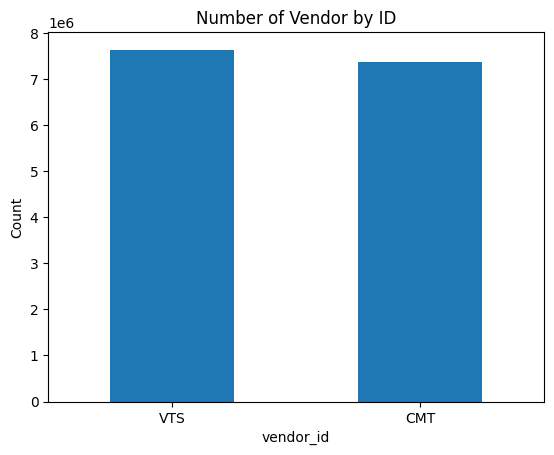

In [33]:
# count the number of occurrences for each type
type_counts = nytaxi['vendor_id'].value_counts()

# plot the bar chart
ax = type_counts.plot.bar(rot=0)

# set axis labels and title
ax.set_xlabel('vendor_id')
ax.set_ylabel('Count')
ax.set_title('Number of Vendor by ID')

# show the plot
plt.show()

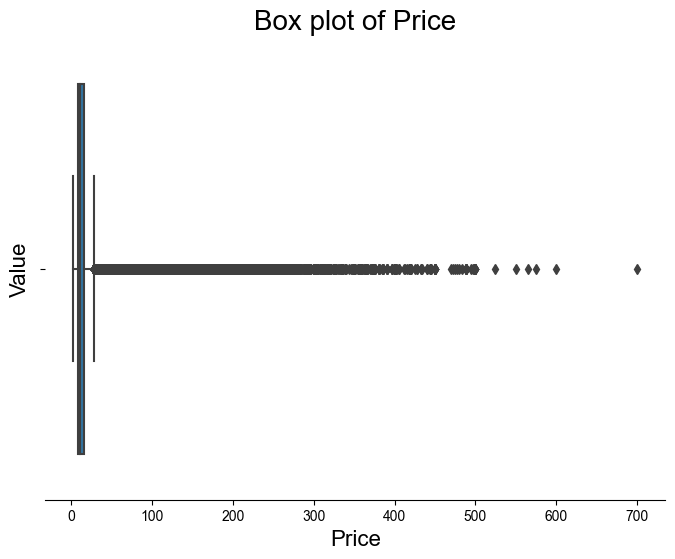

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=nytaxi['total_amount'], data=nytaxi, ax=ax)
sns.set_style('whitegrid')
sns.despine(left=True)
ax.set_title('Box plot of Price', fontsize=20)
ax.set_xlabel('Price', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
plt.show()

<Figure size 3500x2000 with 0 Axes>

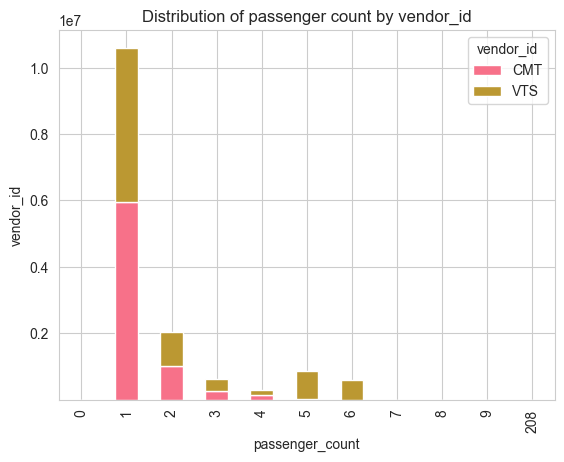

In [35]:

grouped = nytaxi.groupby(['passenger_count', 'vendor_id'])['vendor_id'].count().unstack()

# Set the figure size
#plt.subplots(figsize=(10, 6))
plt.figure(figsize = (35,20))
# Plot a stacked bar chart of the vendors for each passenger count
sns.set_palette('husl')
grouped.plot(kind='bar', stacked=True)
plt.xlabel('passenger_count')
plt.ylabel('vendor_id')
plt.title('Distribution of passenger count by vendor_id')
plt.show();

<a id='feature-correlation'></a>
<font size="+0" color='green'><b> Feature Correlation</b></font>  

<a id='data-preparation'></a>
<font size="+2" color='#053c96'><b> Data Preparation</b></font>  
[back to top](#table-of-contents)

<font size="+0" color='green'><b> Data CLeaning</b></font>  

<font size="-1" color='red'><b> CLeaning PEMS Data</b></font>  

In [36]:
pems07_rel['cost'] = pems07_rel['cost'] * 100

In [62]:
pems04_rel.nunique()

rel_id            340
type                1
origin_id         281
destination_id    282
cost              323
dtype: int64

In [63]:
pems04_dyna.nunique()

dyna_id              5216544
type                       1
time                   16992
entity_id                307
traffic_flow             893
traffic_occupancy       5707
traffic_speed            817
dtype: int64

In [58]:
# Performing an inner join based on the common key 'entity_id'
pemsd4_df = pd.merge(pems04_rel, pems04_dyna, left_on='origin_id', right_on='entity_id', how='inner')
pemsd7_df = pd.merge(pems07_rel, pems07_dyna, left_on='origin_id', right_on='entity_id', how='inner')
pemsd8_df = pd.merge(pems08_rel, pems08_dyna, left_on='origin_id', right_on='entity_id', how='inner')

In [65]:
pemsd8_df.head()

,rel_id,type_x,origin_id,destination_id,cost,dyna_id,type_y,time,entity_id,traffic_flow,traffic_occupancy,traffic_speed
0,0,geo,9,153,310.6,160704,state,2016-07-01T00:00:00Z,9,256.0,0.0385,68.9
1,0,geo,9,153,310.6,160705,state,2016-07-01T00:05:00Z,9,210.0,0.0337,68.0
2,0,geo,9,153,310.6,160706,state,2016-07-01T00:10:00Z,9,224.0,0.0367,66.9
3,0,geo,9,153,310.6,160707,state,2016-07-01T00:15:00Z,9,208.0,0.0324,67.4
4,0,geo,9,153,310.6,160708,state,2016-07-01T00:20:00Z,9,188.0,0.0261,70.4


In [72]:
pemsd4_df.duplicated(subset=['traffic_flow', 'traffic_occupancy', 'traffic_speed']).sum()

737176

In [70]:
pemsd4_df.shape

(5777280, 12)

In [37]:
rels = combine_dataframes([pems04_rel, pems07_rel, pems08_rel])
dyna = combine_dataframes([pems04_dyna, pems07_dyna, pems08_dyna])
geo = combine_dataframes([pems04_geo, pems07_geo, pems08_geo])

In [38]:
# Renaming the columns
rels.rename(columns={'origin_id': 'pickup_location_id', 'destination_id': 'dropoff_location_id'}, inplace=True)

In [56]:
rels.nunique()

rel_id                  866
type                      1
pickup_location_id      866
dropoff_location_id     865
cost                   1210
dtype: int64

In [57]:
dyna.nunique()

dyna_id              24921792
type                        1
time                    63072
entity_id                 883
traffic_flow             1471
traffic_occupancy        5908
traffic_speed             817
dtype: int64

In [51]:
# Performing an inner join based on the common key 'entity_id'
merged_df = pd.merge(rels, dyna, left_on='pickup_location_id', right_on='entity_id', how='inner')

In [52]:
merged_df.head()

,rel_id,type_x,pickup_location_id,dropoff_location_id,cost,dyna_id,type_y,time,entity_id,traffic_flow,traffic_occupancy,traffic_speed
0,0,geo,73,5,352.6,1240416,state,2018-01-01T00:00:00Z,73,47.0,0.0077,68.8
1,0,geo,73,5,352.6,1240417,state,2018-01-01T00:05:00Z,73,25.0,0.0042,66.8
2,0,geo,73,5,352.6,1240418,state,2018-01-01T00:10:00Z,73,55.0,0.0093,67.0
3,0,geo,73,5,352.6,1240419,state,2018-01-01T00:15:00Z,73,70.0,0.0118,67.2
4,0,geo,73,5,352.6,1240420,state,2018-01-01T00:20:00Z,73,82.0,0.0140,67.0


In [55]:
merged_df.duplicated().sum()

0

In [42]:
NYCTaxi_grid.tail()

,dyna_id,type,time,row_id,column_id,inflow,outflow
1313995,1313995,state,2014-12-31T21:30:00Z,14,4,7.0,20.0
1313996,1313996,state,2014-12-31T22:00:00Z,14,4,9.0,26.0
1313997,1313997,state,2014-12-31T22:30:00Z,14,4,9.0,14.0
1313998,1313998,state,2014-12-31T23:00:00Z,14,4,9.0,30.0
1313999,1313999,state,2014-12-31T23:30:00Z,14,4,11.0,22.0


In [43]:
NYCTaxi_geo.head()

,geo_id,type,coordinates,row_id,column_id
0,0,Polygon,[],0,0
1,1,Polygon,[],0,1
2,2,Polygon,[],0,2
3,3,Polygon,[],0,3
4,4,Polygon,[],0,4


In [44]:
NYCTaxi_grid.head()

,dyna_id,type,time,row_id,column_id,inflow,outflow
0,0,state,2014-01-01T00:00:00Z,0,0,42.0,32.0
1,1,state,2014-01-01T00:30:00Z,0,0,65.0,49.0
2,2,state,2014-01-01T01:00:00Z,0,0,34.0,49.0
3,3,state,2014-01-01T01:30:00Z,0,0,28.0,42.0
4,4,state,2014-01-01T02:00:00Z,0,0,27.0,52.0


In [45]:
NYCTaxi_grid['column_id'].value_counts()

0    262800
1    262800
2    262800
3    262800
4    262800
Name: column_id, dtype: int64

In [46]:
NYCTaxi_grid['row_id'].value_counts()

0     87600
1     87600
2     87600
3     87600
4     87600
5     87600
6     87600
7     87600
8     87600
9     87600
10    87600
11    87600
12    87600
13    87600
14    87600
Name: row_id, dtype: int64

In [47]:
nytaxi.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75


<font size="+0" color='green'><b> Handling Imbalanced Classes</b></font>  

<font size="+0" color='green'><b> Feature Engineering</b></font>  

<font size="+0" color='green'><b> Feature Selection</b></font>  

<font size="+0" color='green'><b> Data Transformation</b></font>  

<font size="+0" color='green'><b> Data Splitting</b></font>  